<a href="https://colab.research.google.com/github/rajesh0305/Machine_Learning_Assignment/blob/main/Face_Recognition_Using_PCA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


#Importing data from Scikit learn

In [7]:
from types import new_class
lwf_people = fetch_lfw_people(min_faces_per_person=70,resize = 0.4)
n_samples,h,w = lwf_people.images.shape

x  = lwf_people.data
n_features =x.shape[1]

y = lwf_people.target
target_names = lwf_people.target_names
n_classes = target_names.shape[0]


print("Number of data samples: % d"% n_samples)
print("Size of data sample:%d"%n_features)
print("number of class labels:%d"%n_classes)

Number of data samples:  760
Size of data sample:1850
number of class labels:3


#Displaying the the initial images:

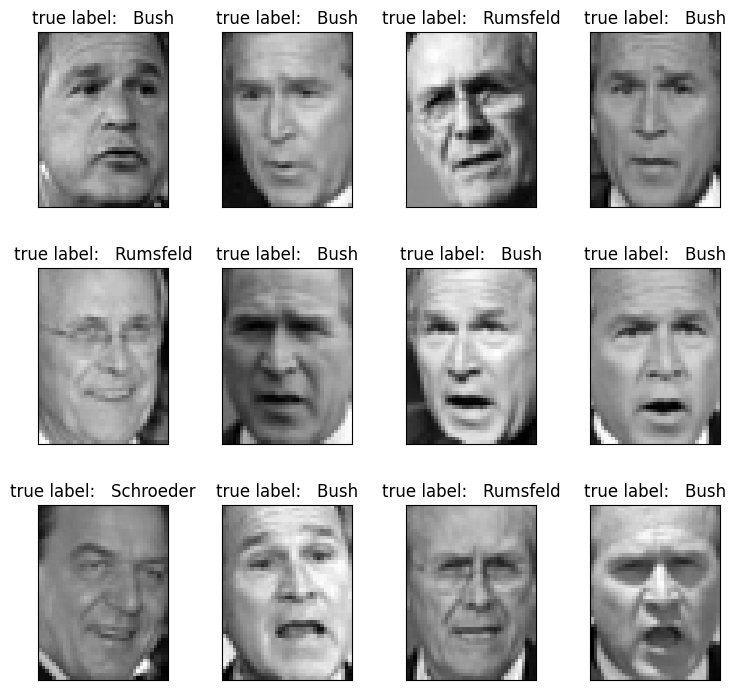

In [8]:
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(x, true_titles, h, w)

#Explitting dataset into train and test dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  570 and Testing Data is  190


#Finding Eigenvalues and Eigenvector

In [28]:
n_components = 150
import time
t0 = time.time()
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)
print("done in % 0.3fs" % (time.time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time.time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (time.time() - t0))

done in  0.109s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.008s


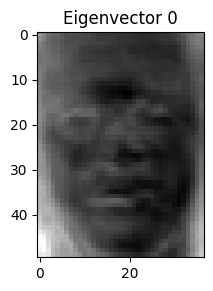

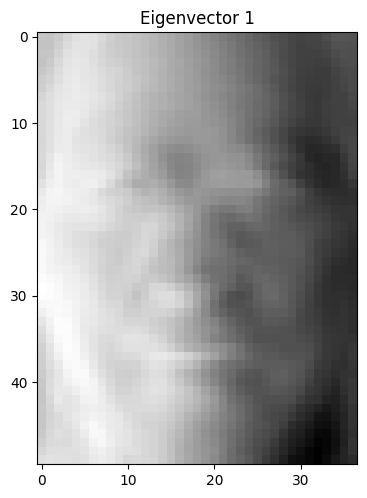

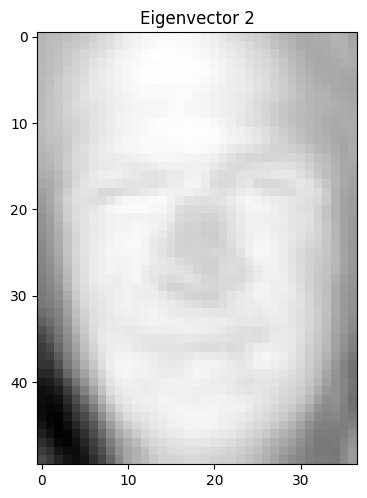

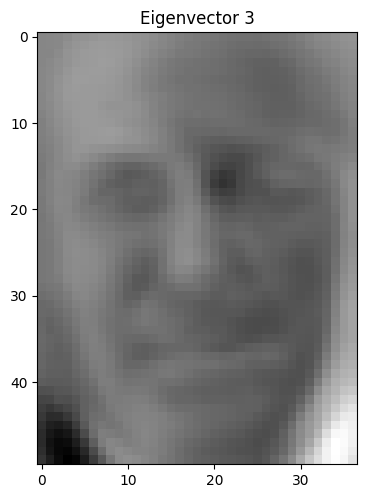

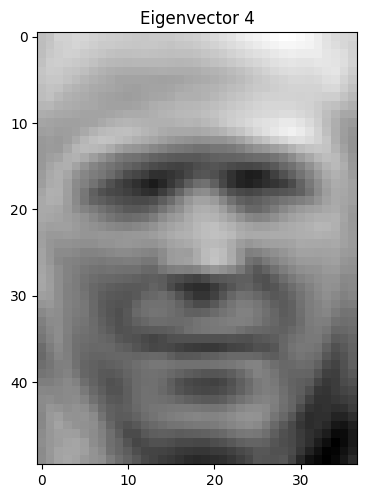

In [34]:
def plot_eigen_vector(eigenvector, index):
    """Plots the eigenvector at the given index."""
    plt.imshow(eigenvector[index], cmap='gray')
    plt.title(f"Eigenvector {index}")
    plt.show()

# Example usage:
plt.figure(figsize =(8*0.5,5*.5))
for i in range(0,5):
  plt.subplots_adjust(bottom=0,left =0.01,right = 0.99,top = 0.90,hspace = 0.35)
  plot_eigen_vector(eigenfaces,i)

# plot_eigen_vector(eigenfaces, 0)

#Finding Average EigenFace

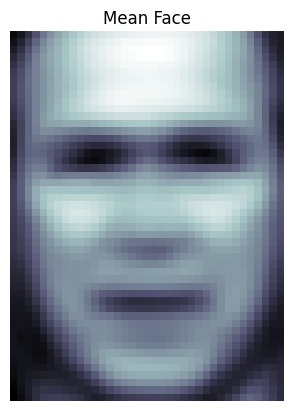

In [35]:
# eigenfaces.plot_mean_vector()
# plt.show()
plt.imshow(pca.mean_.reshape((h, w)), cmap=plt.cm.bone)
plt.title("Mean Face")
plt.axis('off')
plt.show()

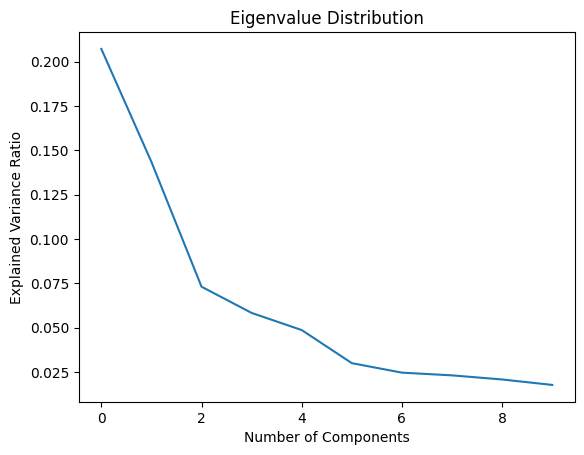

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


plt.plot(range(0,10), pca.explained_variance_ratio_[0:10])
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Eigenvalue Distribution')
plt.show()

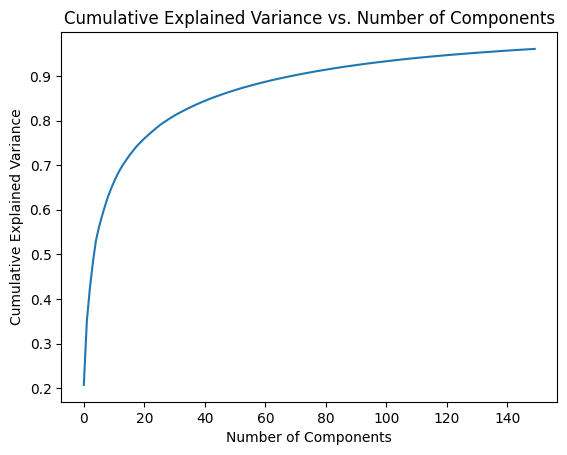

Number of components to explain 95% of variance: 127


In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'pca' is your fitted PCA object
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

# Find the number of components that explain 95% of the variance (for example)
threshold = 0.95
num_components_95 = (cumulative_variance > threshold).argmax() + 1

print(f"Number of components to explain 95% of variance: {num_components_95}")

In [38]:


print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
        X_train.shape, X_test.shape))

Sample Data point after applying PCA
 [-1.4329416   1.23466     0.08194256 -1.639802   -0.16950862 -1.1222688
  0.01160415 -1.6797873  -0.16328636 -0.5262864  -1.1412847  -0.30790168
 -0.2657025  -0.87349004  0.7327608  -0.68242663 -1.0222368   0.10194826
 -0.6900826   0.6585932  -2.1594048  -1.3095881   0.5340575   1.8676019
 -0.8715767   0.29168764 -0.6672377   1.5676373  -0.63097477  1.419319
 -0.37635508 -0.9166775  -0.5835312   0.6558912   0.9419574   0.8521366
  1.6139144   0.3031489  -0.2090369   0.18668601  2.0069628   1.0216202
  0.03779127 -1.9754006   1.5275966   1.0445118  -1.5528437  -0.50947016
 -0.20998743  0.06135925  0.40088233 -0.39093357  2.245877    0.83632654
  0.6386521   1.8843522  -0.17361431  0.07942791  0.36923    -0.55506486
  0.24159887  0.35190904 -0.14384995 -0.11291928  1.2729012   1.839985
 -0.05523754  1.118816   -0.69745034 -0.4855669  -1.4013935  -0.6709919
 -0.5710409  -0.07862495  0.51540345  1.4829541  -1.0974735   1.9678535
  0.49024144 -0.2969260

In [39]:
print("Fitting the classifier to the training set")
t0 = time.time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (time.time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0 = time.time()
y_pred = clf.predict(X_test_pca)
print("done in % 0.3fs" % (time.time() - t0))
# print classification results
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Fitting the classifier to the training set
done in  5.393s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)
Predicting people's names on the test set
done in  0.013s
                   precision    recall  f1-score   support

  Donald Rumsfeld       0.88      0.81      0.84        36
    George W Bush       0.90      0.98      0.94       123
Gerhard Schroeder       1.00      0.77      0.87        31

         accuracy                           0.91       190
        macro avg       0.93      0.85      0.88       190
     weighted avg       0.91      0.91      0.91       190

Confusion Matrix is:
[[ 29   7   0]
 [  3 120   0]
 [  1   6  24]]
